<a id='menu'></a>
<hr style="width:100%;height:4px;border-width:0;color:gray;background-color:#003d59; opacity:0.25"> 

 ![logos](../images/la_dsc_logo.jpg)
 
 <hr style="width:100%;height:4px;border-width:0;color:gray;background-color:#003d59; opacity:0.25"> 

# Data Visualisation in Python

## Chapter 4 – Plotting One Variable
### Hannah Hodge Waller

<hr style="width:100%;height:4px;border-width:0;color:gray;background-color:#003d59; opacity:0.25"> 

Follow along with the code by running cells as you encounter them
<hr style="width:100%;height:4px;border-width:0;color:gray;background-color:#003d59; opacity:0.25"> 

*Chapter Overview*
1. [Packages and Data](#packages_data)
<br><br>
2. [Continuous Data](#continuous)

    2.1. [Histogram](#histogram)
<br><br>
3. [Discrete](#discrete)

    3.1. [Bar (Frequency)](#bar_freq)
    <br>
    3.2. [Pie Charts](#pie_charts)
 

<hr style="width:100%;height:4px;border-width:0;color:gray;background-color:#003d59; opacity:1"> 

<a id='packages_data'></a>
# 1. Packages and Data

 Let’s start, as always by loading our packages and our data.
 
 We’re using:
 
 `pandas`
 
 `numpy`
 
 `matplotlib’s pyplot module.`
 
 `seaborn`
 
 We're following standard convention for nicknames.
 
 We’ll also load the gapminder data.

In [1]:
 # Load packages

import pandas as pd

import matplotlib.pyplot as plt

import numpy as np

import seaborn as sns

# Load data

gapminder = pd.read_csv("../data/gapminder.csv")

 We’ll also use the magic command
 
 `% matplotlib inline`
 
 This means any plot we create will be automatically embedded below the code cell once the code has been executed.

In [2]:
 % matplotlib inline

When we load Seaborn it uses it’s style as the default one; overriding Matplotlib. 

Here I’m setting the default style to `ticks` which is the most similar to our Matplotlib default.

HHW I probably need something in here about setting the defaults; but I not doing it just yet.

In [3]:
sns.set_style("ticks")

 As a reminder visualisation code can get lengthy quickly.
 
 A lot of these visualisations will only have **one or two new concepts,** the other code will be things covered previously.
 
To make the code clearer we will be using lots of comments. In Python these look like this:

``` python

# This is a comment

```

As we get into more complicated visualisations  new  concepts will have the word NEW -  at the start of the comment e.g:

``` python

#  NEW - Set X Axis

```

We will also refer to line numbers to describe content.

You can turn on line numbers in the View Menu -> Toggle Line Numbers

[return to menu](#menu)

<hr style="width:100%;height:4px;border-width:0;color:gray;background-color:#003d59; opacity:1"> 

<a id='continuous'></a>
# 2. Continuous Data

<hr style="width:75%;height:4px;border-width:0;color:gray;background-color:#003d59; opacity:0.75"> 

<a id='histogram'></a>
## 2.1 Histogram

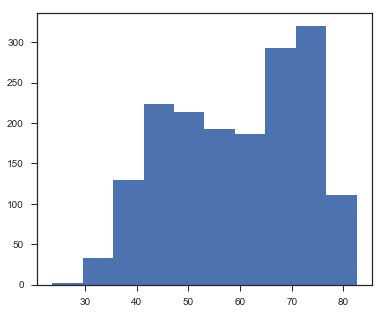

In [4]:
figure, axes = plt.subplots(figsize=(6, 5))
axes.hist(gapminder["life_exp"]);

<hr style="width:50%;height:4px;border-width:0;color:gray;background-color:#003d59; opacity:0.5"> 

### 2.1.1 Histograms v.s Bar Charts

<hr style="width:50%;height:4px;border-width:0;color:gray;background-color:#003d59; opacity:0.5"> 

### 2.1.2 Changing bin sizes        

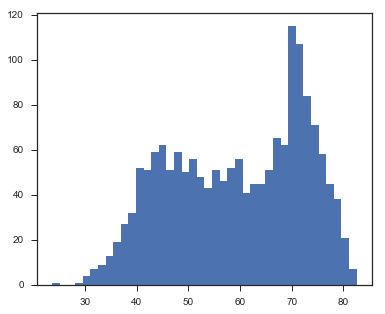

In [5]:
figure, axes = plt.subplots(figsize=(6, 5))
axes.hist(gapminder["life_exp"],
         bins = 40  );

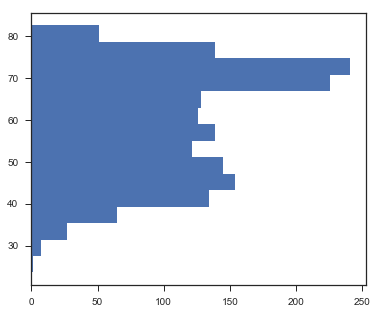

In [6]:
figure, axes = plt.subplots(figsize=(6, 5))
axes.hist(gapminder["life_exp"],
         bins = 15,
         orientation = "horizontal");

<hr style="width:50%;height:4px;border-width:0;color:gray;background-color:#003d59; opacity:0.5"> 

### 2.1.3 Colours       

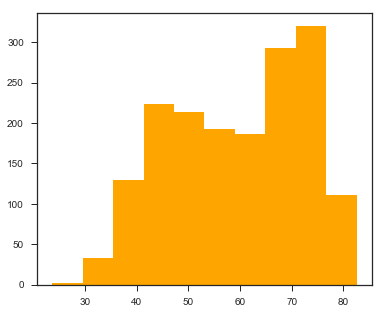

In [7]:
figure, axes = plt.subplots(figsize=(6, 5))
axes.hist(gapminder["life_exp"],
         color = "orange");

[return to menu](#menu)

<hr style="width:100%;height:4px;border-width:0;color:gray;background-color:#003d59; opacity:1"> 

<a id='discrete'></a>
# 3. Discrete Data

<hr style="width:75%;height:4px;border-width:0;color:gray;background-color:#003d59; opacity:0.75"> 

<a id='bar_freq'></a>
## 3.1 Bar (Frequency) Chart

In this section we’ll look at bar charts as they relate to frequency of the data. In Chapter 5 we’ll look at bar charts with a continuous y and discrete x.

#HHW - I'm not sure if it's work having this sectioon on numerical bar charts AND then one on categoricals. You still have to do the really stupid thing of fiddling with the damn index because Matplotlib :/

In [8]:
# Add in a new column - 1 if greater than or equal to mean GDP of the total data. 0 if less than total mean GDP of data.

gapminder["above_mean_gdp"] = ( gapminder["gdp_per_cap"] >= gapminder["gdp_per_cap"].mean()).astype("int64")


# Create a new dataset just for 1992
gapminder_1992 = gapminder[gapminder["year"] == 1992] 


# Group by this new column and do a count.


mean_gdp_92 = gapminder_1992.groupby("above_mean_gdp")["country"].count()

# Look at the Data

mean_gdp_92

above_mean_gdp
0    90
1    52
Name: country, dtype: int64

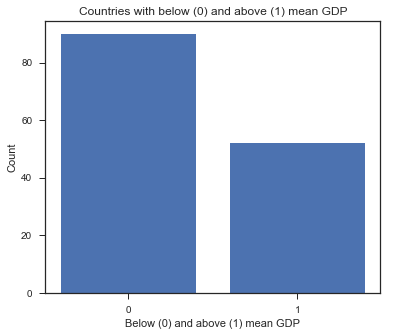

In [9]:
figure, axes = plt.subplots(figsize=(6, 5))
axes.bar( left = mean_gdp_92.index,  # The X axis is the index values
         height = mean_gdp_92,
         tick_label = mean_gdp_92.index)



# Add Labels and titles
axes.set_title("Countries with below (0) and above (1) mean GDP")
axes.set_xlabel("Below (0) and above (1) mean GDP")
axes.set_ylabel("Count");

<hr style="width:50%;height:4px;border-width:0;color:gray;background-color:#003d59; opacity:0.5"> 

### 3.1.1 Plotting Categorical Variables       

#HHW - This bit is "categorical" - unsure if I should delete the above section.
I can't think of anything else that is really a bar chart; the others are continuous data. See if Ian has any ideas.

Below I’m preparing my data. I’m using a groupby to return the number of countries in each continent.
I’m using the parameter here 
```python
as_index = False

```
If we don’t set this parameter our continents will become our index.

Usually this is fine – however when plotting bar charts Matplotlib **won’t** let us use text columns for our X axis; this includes an index that is text.

By having a numerical index we can create our bar chart and then use column with the continents to display our tick labels.

In [10]:
number_countries = gapminder_1992.groupby(by = "continent", as_index= False)["country"].count()

number_countries.rename(columns = {"country": "num_countries"}, inplace= True) # Change the column name to be more descriptive

number_countries

,continent,num_countries
0,Africa,52
1,Americas,25
2,Asia,33
3,Europe,30
4,Oceania,2


In a bar plot we have the following arguments;

`left = ` the values we want on the X axis

`height = ` The values we want for the height of the bars.

As mentioned earlier `left = ` only accepts scalar values. Here we’re using the index of the DataFrame.

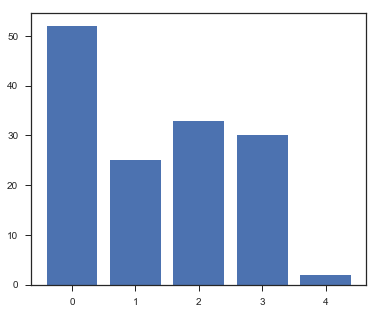

In [11]:
figure, axes = plt.subplots(figsize=(6, 5))
axes.bar( left = number_countries.index,  # The X axis is the index values
         height = number_countries["num_countries"]);

We can add the names of the continent back by using the `tick_label = ` parameter; and setting this to the `continent` column.

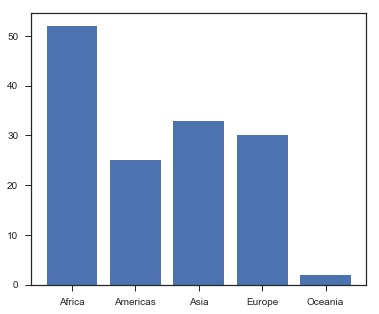

In [12]:
figure, axes = plt.subplots(figsize=(6, 5))
axes.bar( left = number_countries.index,  # The X axis is the index values
         height = number_countries["num_countries"],
        tick_label = number_countries["continent"]); # Set the tick labels to be the continent names, not just numbers.

#### Seaborn

Seaborn makes it much easier to create this bar chart.

To match the other visualisation I need to sort my gapminder data by continent.

I can simply set my x axis to be the continent column, the y axis to be the life expectancy column (it automatically assumes I want the mean) and my data as the sorted dataframe `gapminder_sort_continent`.

By default the `sns.barplot()` has confidence interval bars on; we turn those off by setting `ci = False`

`estimator =` is by default the mean; but we can pass a different argument here, such as the count (using `np.count_nonzero`) we've done here or np.median.


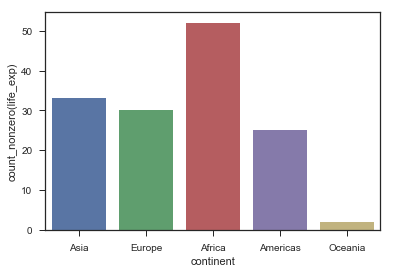

In [13]:
sns.barplot(x='continent', y = "life_exp" , data=gapminder_1992,
           ci = None, # Removes confidence interval bars
           estimator = np.count_nonzero ); # Uses the count - mean is default

### 3.1.2 Ordered Bar Charts

Good practice is often to sort our bar chart values in ascending or descending order. Which order depends on what we want to highlight – the smallest or the largest values.

Here I’m creating a new dataframe with the ascending values. Note that it’s really important to reset the index here – after all we are using the index to state what order we want our bars on the chart.

In [14]:
# Create a new dataframe - where the number of continents is sorted in ascending order.

asc_number_countries = number_countries.sort_values(by = "num_countries").reset_index()

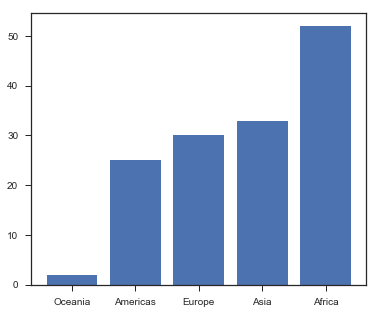

In [15]:
figure, axes = plt.subplots(figsize=(6, 5))
axes.bar( left = asc_number_countries.index,  # The X axis is the index values
         height = asc_number_countries["num_countries"],
       tick_label = asc_number_countries["continent"]); # Set the tick labels to be the continent names, not just numbers.

And in descending order we just set `ascending = False`.

In [16]:
# Create a new dataframe - where the number of continents is sorted in descending order.

desc_number_countries = number_countries.sort_values(by = "num_countries", ascending= False).reset_index()

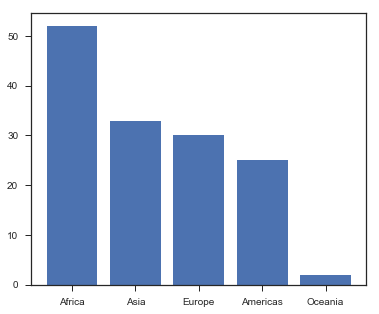

In [17]:
figure, axes = plt.subplots(figsize=(6, 5))
axes.bar( left = desc_number_countries.index,  # The X axis is the index values
         height = desc_number_countries["num_countries"],
       tick_label = desc_number_countries["continent"]); # Set the tick labels to be the continent names, not just numbers.

For Seaborn, again using pre-sorted data is the simplest way to get your plot to look the way you desire.

I am using the `asc_number_countries` and the `desc_number_countries` Dataframes we created earlier.

Note that here Seaborn colours each bar a different colour, as our continents are a broad group our guidelines say they should be the same colour. We’ll cover how to do this in a later section.

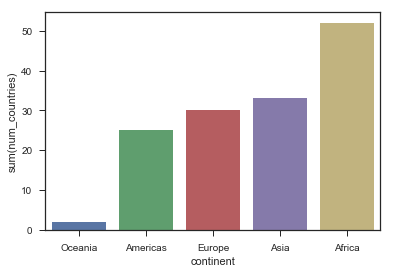

In [18]:
# Ascending

sns.barplot(x='continent', y = "num_countries" , data=asc_number_countries,
           ci = None, # Removes confidence interval bars
           estimator = np.sum); # Uses the count - mean is default

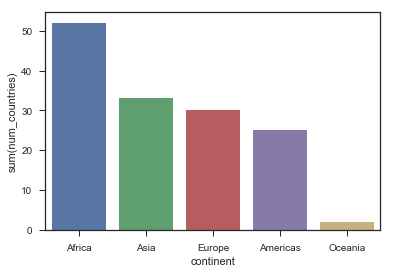

In [19]:
# Descending

sns.barplot(x='continent', y = "num_countries" , data=desc_number_countries,
           ci = None, # Removes confidence interval bars
           estimator = np.sum); # Uses the count - mean is default

### 3.1.3 Horizonal Bar Charts

If tick labels are long a horizontal bar chart is often preferable to rotating tick labels.

A horizontal bar chart is created by using `barh`

Note the parameters are different than our `bar` above

` bottom = ` takes our y axis, or countries in this case. Again this only takes numerical arguments - so we'll use the index.

`width = ` is the values on our x axis; the mean life expectancy.

We'll use `tick_label =` to apply our names to the labels.


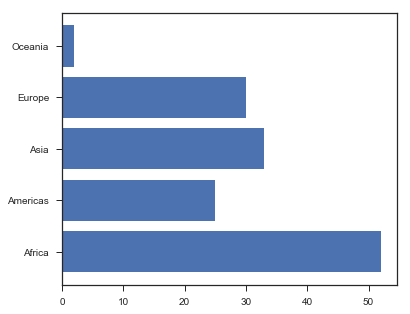

In [20]:
figure, axes = plt.subplots(figsize=(6, 5))
axes.barh( bottom = number_countries.index,  # The Y axis is the index values
         width = number_countries["num_countries"],
          tick_label = number_countries["continent"]); # Set the tick labels to be the continent names, not just numbers.

#### Seaborn

To create a horizontal bar chart in Seaborn you need to change the x and y axis around; and set the parameter `orient = h`.

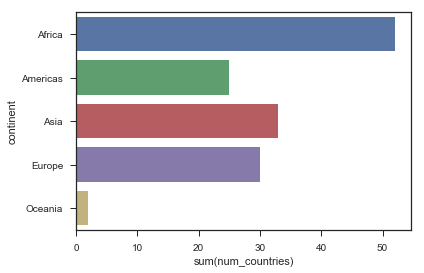

In [21]:
sns.barplot(y='continent', x = "num_countries" , data=number_countries, # note x and y are reversed
           ci = None, # Removes confidence interval bars
           estimator = sum, # Uses the count - mean is default
            orient = "h"); # Changes the orientation to horizontal

<hr style="width:75%;height:4px;border-width:0;color:gray;background-color:#003d59; opacity:0.75"> 

### 3.1.4 Spacing Between Bars

In Matplotlib you can alter the spacing by adjusting the width of the bars using the `width = ` parameter. 

This takes a scale from 0 (farthest apart) to 1 (touching). The default is 0.8

#HHW - Not best practice!

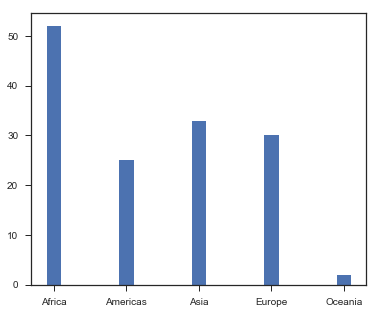

In [22]:
figure, axes = plt.subplots(figsize=(6, 5))
axes.bar( left = number_countries.index,  # The X axis is the index values
         height = number_countries["num_countries"],
        tick_label = number_countries["continent"],
        width = 0.2); # Set the tick labels to be the continent names, not just numbers.

Again this is also possible in Seaborn, but can require a function to modify the patches attribute. 

Help for this is available in [several stack overflow answers]( https://stackoverflow.com/questions/36824229/how-to-set-width-on-seaborn-barplot)



<hr style="width:50%;height:4px;border-width:0;color:gray;background-color:#003d59; opacity:0.5"> 

### 3.1.5 Colouring Bars       

We can use the same colour formats here as we explored in Chapter 3. We won’t be going over all the details again in these subsequent sections; but will just be showing you one or two examples with different methods.

We should use the same colour and shade for categorical data that cannot be organised into broad groups.

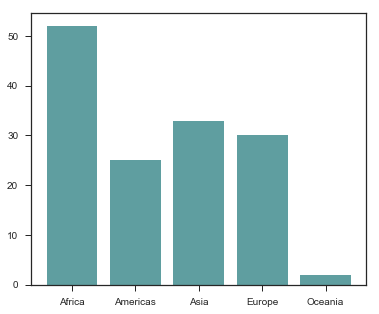

In [23]:
figure, axes = plt.subplots(figsize=(6, 5))
axes.bar( left = number_countries.index,  # The X axis is the index values
         height = number_countries["num_countries"],
        tick_label = number_countries["continent"],
        color = "CadetBlue"); # Set the tick labels to be the continent names, not just numbers.

We’ll discuss multiple colours when we look at bar charts with a continuous y and discrete x in Chapter 5.  Our continents are a broad group, so according to guidance it’s not appropriate to colour them individually.

#### Seaborn

Seaborn uses the `color = ` parameter.



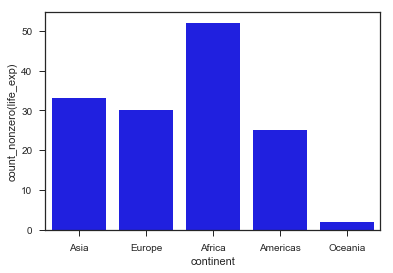

In [24]:
sns.barplot(x='continent', y = "life_exp" , data=gapminder_1992,
           ci = None, # Removes confidence interval bars
           estimator = np.count_nonzero, # Uses the count - mean is default
           color= "blue"); 

<hr style="width:25%;height:4px;border-width:0;color:gray;background-color:#003d59; opacity:0.25"> 

[return to menu](#menu)

<hr style="width:100%;height:4px;border-width:0;color:gray;background-color:#003d59; opacity:1"> 

<a id='pie_charts'></a>
## 3.2 Pie Charts

#HHW - The slogan for Pie Charts should be - They're not great.

Pie charts are generally not a favoured type of visualisation. You should consider if a bar chart or a table is a better method of communicating your data.

If you do choose to use a pie chart you should remember they should

* have 6 or less categories. You may want to combine smaller categories if appropriate
* Rank the categories in a pie chart
* Start at the 12 o’clock position

Pie charts should always sum to 100%, if they do not then a pie chart is not appropriate.

Note that 3D Pie Charts and pie charts with a drop shadow are frowned upon even more so than ordinary pie charts. Avoid at all cost.

For a pie chart we plot our `x` as the values we wish to plot. Matplotlib will automatically make this into a percentage of a whole, we don’t need to work our proportions out manually.

We’re also setting the start angle to be 90 and the direction to be clockwise (`counterclock = False`) to ensure we follow the guidance above.


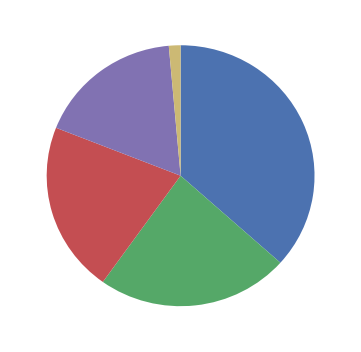

In [25]:
figure, axes = plt.subplots(figsize=(6, 6))

axes.pie(x = desc_number_countries["num_countries"],
         startangle=90, # NEW - Sets the angle for the pie chart to start
        counterclock = False); # NEW - We wish to plot this data clockwise.

<hr style="width:75%;height:4px;border-width:0;color:gray;background-color:#003d59; opacity:0.75"> 

### 4.1.1 Labels

Our pie chart needs labels to be readable; we add these using the `labels = ` parameter.

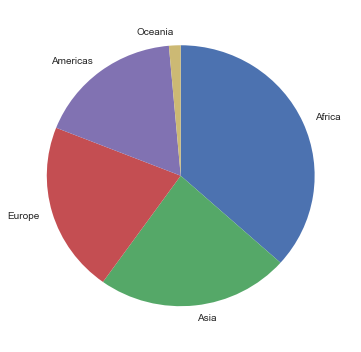

In [26]:
figure, axes = plt.subplots(figsize=(6, 6))
axes.pie(x = desc_number_countries["num_countries"],
        labels = desc_number_countries["continent"], # NEW - Add labels
        startangle=90, # Sets the angle for the pie chart to start
        counterclock = False); # We wish to plot this data clockwise.

<hr style="width:75%;height:4px;border-width:0;color:gray;background-color:#003d59; opacity:0.75"> 

### 4.1.2 Percentages       

We can also get matplotlib to calculate our percentages. We do this with the `autopct =` parameter. This uses string formatting to display the 

* The first % symbol indicates we want to work out a percentage. 
* The 0.2 indicates the number of decimal points, here 2.
* The two %% symbols show the % symbol on the chart.


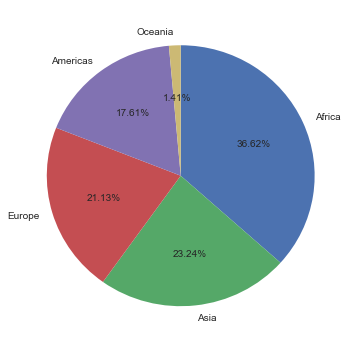

In [28]:
figure, axes = plt.subplots(figsize=(6, 6))

axes.pie(x = desc_number_countries["num_countries"],
        labels = desc_number_countries["continent"], #  Add labels
        startangle=90, # Sets the angle for the pie chart to start
        counterclock = False, # We wish to plot this data clockwise.
        autopct = "%0.2f%%" ); # NEW Add the % symbol

We can use the parameter `pctdistance = ` to move the percentage symbols. 1 is on the edge of the pie chart and 0 is in the centre.

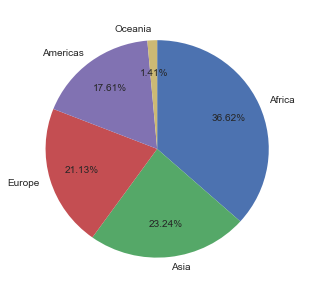

In [29]:
figure, axes = plt.subplots(figsize=(5, 5))

axes.pie(x = desc_number_countries["num_countries"],
        labels = desc_number_countries["continent"], #  Add labels
        startangle=90, # Sets the angle for the pie chart to start
        counterclock = False, # We wish to plot this data clockwise.
        autopct = "%0.2f%%",
        pctdistance = 0.7); # NEW Add the % symbol

You can also give a number greater than 1 to move the % outside of the pie chart; we also have `labeldistance = ` which allows us to move the labels.

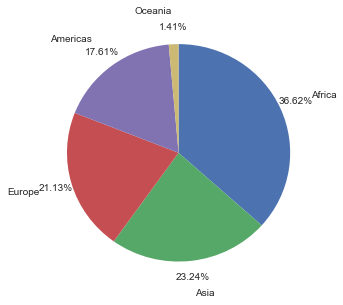

In [30]:
figure, axes = plt.subplots(figsize=(5, 5))

axes.pie(x = desc_number_countries["num_countries"],
        labels = desc_number_countries["continent"], #  Add labels
        startangle=90, # Sets the angle for the pie chart to start
        counterclock = False, # We wish to plot this data clockwise.
        autopct = "%0.2f%%",
        pctdistance = 1.15,
        labeldistance= 1.3); 

We can also use a short lambda anonymous function to display the number of values on the pie chart as well as the percentages.

Geeks for Geeks has a good [tutorial]( https://www.geeksforgeeks.org/python-lambda-anonymous-functions-filter-map-reduce/) if you’ve not seen lambda functions before.


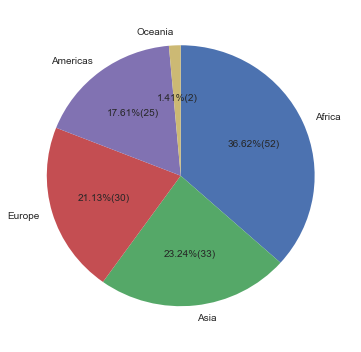

In [31]:
figure, axes = plt.subplots(figsize=(6, 6))

axes.pie(x = desc_number_countries["num_countries"],
        labels = desc_number_countries["continent"], #  Add labels
        startangle=90, # Sets the angle for the pie chart to start
        counterclock = False, # Plot data clockwise
        autopct=lambda p: '{:.2f}%({:.0f})'.format(p,(p/100)*desc_number_countries["num_countries"].sum())); 
        # Adds in the number values of each continent.

<hr style="width:75%;height:4px;border-width:0;color:gray;background-color:#003d59; opacity:0.75"> 

### 4.1.3 Colours       

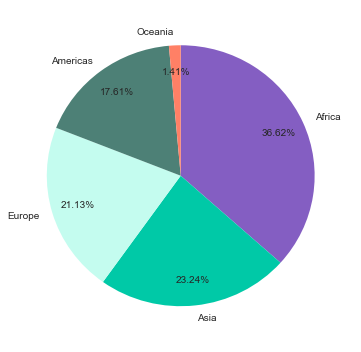

In [32]:
colour_list = [ "#845EC2" , "#00C9A7" ,  "#C4FCEF" ,  "#4D8076", "#FF8066"]

figure, axes = plt.subplots(figsize=(6, 6))

axes.pie(x = desc_number_countries["num_countries"],
        labels = desc_number_countries["continent"],
        startangle=90,
        counterclock = False,
        autopct = "%0.2f%%",
        pctdistance = 0.8,
        colors = colour_list);

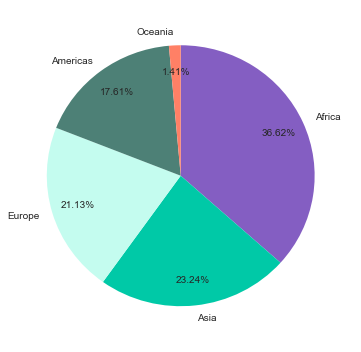

In [32]:
colour_list = [ "#845EC2" , "#00C9A7" ,  "#C4FCEF" ,  "#4D8076", "#FF8066"]

figure, axes = plt.subplots(figsize=(6, 6))

axes.pie(x = desc_number_countries["num_countries"],
        labels = desc_number_countries["continent"],
        startangle=90,
        counterclock = False,
        autopct = "%0.2f%%",
        pctdistance = 0.8,
        colors = colour_list);

<hr style="width:75%;height:4px;border-width:0;color:gray;background-color:#003d59; opacity:0.75"> 

### 4.1.4 Exploding Segments

#HWW I mean like - If you really must

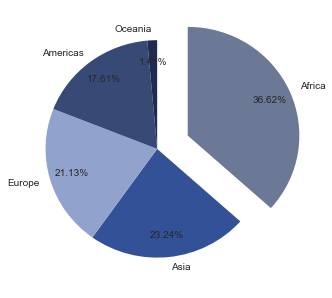

In [40]:
colour_list = [ "#6c7996" , "#325196" ,  "#91a2cc" ,  "#374a76", "#1f2b51"]

figure, axes = plt.subplots(figsize=(5, 5))

axes.pie(x = desc_number_countries["num_countries"],
        labels = desc_number_countries["continent"],
        startangle=90,
        counterclock = False,
        autopct = "%0.2f%%",
        pctdistance = 0.8,
        colors = colour_list,
        explode = [0.3,0,0,0,0]);

### 4.1.5 Donut Charts

> "Donuts. Is there anything they can't do?" *Homer Simpson*

Donut plots are generally considered superior to pie charts. This isn’t to say that they’re recommended over other ways of displaying your data; but if you do need to use something in the Pie Chart family, this would be our recommendation. This is because the white space in the middle makes it easier for the human eye to determine the proportions.

In Matplotlib we create a donut chart by first creating a pie chart, then by creating a white circle and overlaying that on our pie chart. This seems like a “hacky” way to do this; but there isn’t an inbuilt function.

In this section we’re creating something known as a patch, an `artist` object. These can be used for a wide variety of things, including fine tuning images. We feel they’re slightly beyond the scope of this course, but you can find more information in the [matplotlib documentation]( https://matplotlib.org/api/_as_gen/matplotlib.patches.Circle.html) if you should require it.

Importantly we can alter the `radius = ` parameter to set the size of the inner circle, and you can change the colour if you have your plot on a different coloured background; although this is not advised.


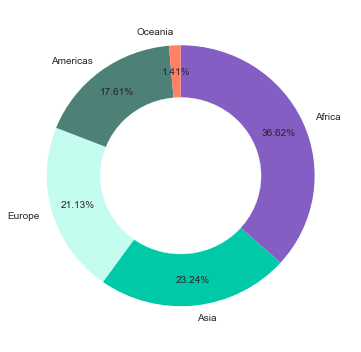

In [39]:
# Set up the colours

colour_list = [ "#845EC2" , "#00C9A7" ,  "#C4FCEF" ,  "#4D8076", "#FF8066"]

# Create the Pie chart

figure, axes = plt.subplots(figsize=(6, 6))

axes.pie(x = desc_number_countries["num_countries"],
        labels = desc_number_countries["continent"],
        startangle=90,
        counterclock = False,
        autopct = "%0.2f%%",
        pctdistance = 0.8,
        colors = colour_list);

# NEW - Create a circle that overlays the Pie Chart

my_circle=plt.Circle( (0,0), radius = 0.6, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle);

[return to menu](#menu)

<hr style="width:100%;height:4px;border-width:0;color:gray;background-color:#003d59; opacity:1"> 

# End of Chapter

You have completed chapter 2 of the Data Visualisation course. Please move on to chapter 3.


[return to menu](#menu)